In [1]:
# load packages 
library(pacman)
p_load(
    tidyverse, data.table, dtplyr, reshape2, 
    archive, kableExtra, SPARQL, janitor, 
    png, webp, Cairo, rsvg,
    httr, jsonlite)
# set option
options(dplyr.summarise.inform = FALSE)
gray_scale <- c('#F3F4F8','#D2D4DA',  '#bcc0ca', 
                '#D3D3D3', '#2B2B2B', 
                '#B3B5BD', '#838383', 
                '#9496A1', '#7d7f89', '#777986', 
                '#656673', '#5B5D6B', '#4d505e',
                '#404352', '#2b2d3b', '#282A3A',
                '#1b1c2a', '#191a2b',
                '#141626', '#101223')

In [2]:
# set up working directory
setwd('work/notebooks/patent')

In [62]:
# Code-Block 5. Extract patents for one-company full code
# read dataset 1, 2, and 3 
de_firms <- fread('./data/orbis_de_matched_l.csv')
han_names <- fread('./data/202208_HAN_NAMES.txt')
han_patents <- fread('./data/202208_HAN_PATENTS.txt')

# filter out germany firms from han_names 
# by setting Person_ctry_code == 'DE'
# match names "AIRBUS DEFENCE" and get their HAN_ID
airbus <- toupper('Airbus Defence')
han_names %>%
    .[Person_ctry_code == 'DE'] %>%
    .[Clean_name %like% airbus] %>%
    .[,HAN_ID] -> airbus_han_ids

# calcualte the summary statistics for AIRBUS DEFENCE
han_patents %>%
    .[HAN_ID %in% airbus_han_ids] %>%
    .[, .N, by=Publn_auth] -> foo
    transform(adorn_totals(foo)) %>%
    transpose() %>%
    row_to_names(row_number=1)

# focusing on patents from EPO
# filter with condition Publn_auth == 'EP'
han_patents %>%
    .[HAN_ID %in% airbus_han_ids] -> airbus_han_patents

# save the dataset
write.csv(airbus_han_patents, './data/airbus_han_patents.csv', row.names=FALSE)

,EP,US,WO,Total
,<chr>,<chr>,<chr>,<chr>
2,716,415,88,1219


In [50]:
airbus_ep_application <- fread('./data/airbus_ep_applications.csv')

In [51]:
dim(airbus_ep_application)

[1] 716   7

In [5]:
head(airbus_ep_application)

patentNumber,applicationDate,granted,grantDate,familyID,cpcTags,publicationItems
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
EP2030891,"Wed, 04 Jun 2008",0,,39745168,B64C 1/068,"['EP 2030891 A2', 'EP 2030891 A3']"
EP2025928,"Thu, 24 Jul 2008",0,,40039666,"['F03D 1/0675', 'F03D 3/062']","['EP 2025928 A2', 'EP 2025928 A3']"
EP1920908,"Fri, 02 Nov 2007",1,"Wed, 08 Apr 2015",39118022,"['B29C 70/386', 'B29C 70/541', 'B29C 70/543', 'B29C 70/545', 'B29C 70/56']","['EP 1920908 A1', 'EP 1920908 B1']"
EP1972896,"Sat, 08 Mar 2008",1,"Wed, 06 May 2015",39544979,G01C 23/00,"['EP 1972896 A2', 'EP 1972896 A3', 'EP 1972896 B1']"
EP2134522,"Thu, 13 Mar 2008",1,"Wed, 01 Mar 2017",39595708,"['B29B 11/16', 'B29C 70/382', 'B29C 70/386', 'B29C 70/545', 'B65H 49/18', 'B65H 51/005', 'B65H 57/16', 'D02J 1/18', 'D04H 1/4242', 'D04H 1/60', 'D04H 1/655', 'D04H 13/00', 'D04H 3/002', 'D04H 3/04', 'D04H 3/12']","['EP 2134522 A1', 'EP 2134522 B1', 'EP 2134522 B8']"
EP2136979,"Thu, 13 Mar 2008",1,"Wed, 11 May 2016",39495747,"['B29B 11/16', 'B29C 31/085', 'B29C 70/386', 'B29C 70/541', 'B29C 70/543', 'B29C 70/545']","['EP 2136979 A1', 'EP 2136979 B1']"


In [53]:
airbus_ep_publications <- fread('./data/airbus_ep_publications.csv')

In [54]:
dim(airbus_ep_publications)

[1] 539   5

In [55]:
head(airbus_ep_publications)

patentNumber,publicationDate,priorityNumber,language,ipc
<chr>,<chr>,<chr>,<chr>,<chr>
EP1920908,"Wed, 08 Apr 2015",DE/102006052592,de,"['B29C 70/38', 'B29C 70/54', 'B29C 70/56']"
EP1972896,"Wed, 06 May 2015",DE/102007014015,de,"['B64D 45/08', 'G01C 23/00']"
EP2134522,"Wed, 01 Mar 2017",DE/102007012608,de,"['B29B 11/16', 'B29C 70/20', 'B29C 70/38', 'B29C 70/54', 'B65H 49/18', 'B65H 51/005', 'B65H 57/16', 'D02J 1/18', 'D04H 1/4242', 'D04H 1/60', 'D04H 1/655', 'D04H 13/00', 'D04H 3/002', 'D04H 3/04', 'D04H 3/12']"
EP2136979,"Wed, 11 May 2016",DE/102007012609,de,"['B29B 11/16', 'B29C 70/38', 'B29C 70/54']"
EP1976108,"Wed, 21 Oct 2020",DE/102007015302,de,"['H02M 3/337', 'H02M 7/5387']"
EP2039604,"Wed, 01 Mar 2017",DE/102007045205,de,"['B64D 1/04', 'F41A 9/09', 'G01B 7/00', 'G01B 7/14', 'G01S 5/16']"


In [13]:
airbus_ep_application %>%
    .[, date := tstrsplit(applicationDate, split=',', keep=c(2))] %>%
    .[, year := tstrsplit(date, split=' ', keep=c(4))] %>%
    head()
    

patentNumber,applicationDate,granted,grantDate,familyID,cpcTags,publicationItems,date,year
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
EP2030891,"Wed, 04 Jun 2008",0,,39745168,B64C 1/068,"['EP 2030891 A2', 'EP 2030891 A3']",04 Jun 2008,2008
EP2025928,"Thu, 24 Jul 2008",0,,40039666,"['F03D 1/0675', 'F03D 3/062']","['EP 2025928 A2', 'EP 2025928 A3']",24 Jul 2008,2008
EP1920908,"Fri, 02 Nov 2007",1,"Wed, 08 Apr 2015",39118022,"['B29C 70/386', 'B29C 70/541', 'B29C 70/543', 'B29C 70/545', 'B29C 70/56']","['EP 1920908 A1', 'EP 1920908 B1']",02 Nov 2007,2007
EP1972896,"Sat, 08 Mar 2008",1,"Wed, 06 May 2015",39544979,G01C 23/00,"['EP 1972896 A2', 'EP 1972896 A3', 'EP 1972896 B1']",08 Mar 2008,2008
EP2134522,"Thu, 13 Mar 2008",1,"Wed, 01 Mar 2017",39595708,"['B29B 11/16', 'B29C 70/382', 'B29C 70/386', 'B29C 70/545', 'B65H 49/18', 'B65H 51/005', 'B65H 57/16', 'D02J 1/18', 'D04H 1/4242', 'D04H 1/60', 'D04H 1/655', 'D04H 13/00', 'D04H 3/002', 'D04H 3/04', 'D04H 3/12']","['EP 2134522 A1', 'EP 2134522 B1', 'EP 2134522 B8']",13 Mar 2008,2008
EP2136979,"Thu, 13 Mar 2008",1,"Wed, 11 May 2016",39495747,"['B29B 11/16', 'B29C 31/085', 'B29C 70/386', 'B29C 70/541', 'B29C 70/543', 'B29C 70/545']","['EP 2136979 A1', 'EP 2136979 B1']",13 Mar 2008,2008


In [56]:
airbus_prior <- fread('./data/airbus_ep_pub_prior.csv')

In [57]:
dim(airbus_prior)

[1] 539   6

In [86]:
foo <- fread("./data/airbus_app_prior.csv")
dim(foo)

[1] 539   8

In [ ]:
get_date <- function(date_string) {
    
}

In [99]:
substrRight <- function(x, n=4){
  substr(x, nchar(x)-n+1, nchar(x))
}

In [100]:
strfoo <- 'Fri, 02 Nov 2007'
substrRight(strfoo)

[1] "2007"

In [135]:
foo %>%
    .[, priorityYear := lapply(priorityDate, substrRight)] %>%
    .[, applicationYear := lapply(applicationDate, substrRight)] %>%
    .[, grantYear := lapply(grantDate, substrRight)] %>%
    as_tibble() %>%
    select(priorityYear, applicationYear, grantYear) %>%
    group_by(grantYear) %>%
    summarize(count=n()) -> gy_count

In [145]:
names(ay_count)[1] <- 'Year'
names(py_count)[1] <- 'Year'
names(gy_count)[1] <- 'Year'

In [160]:
fj1 <- full_join(py_count, ay_count, by='Year') 
fj2 <- full_join(fj1, gy_count, by='Year')
names(fj2) <- c('Year', 'priorityDate', 'applicationDate', 'grantedDate')
head(fj2)

Year,priorityDate,applicationDate,grantedDate
<list>,<int>,<int>,<int>
2006,3,NA,NA
2007,13,3,NA
2003,1,NA,NA
2004,1,1,NA
2008,11,13,NA
2009,16,11,NA


In [161]:
fwrite(fj2, './data/fj2.csv')

## EPO Citations

In [15]:
epo_citations <- fread('./data/202208_EPO_CITATIONS.txt')

In [16]:
dim(epo_citations)

[1] 12965763       15

In [17]:
head(epo_citations)

Citing_pub_nbr,Citing_pub_date,Citing_app_nbr,Citing_appln_id,Cited_pub_nbr,Cited_pub_date,Cited_App_auth,Cited_App_nbr,Cited_Appln_id,Cit_Total,Citn_origin,Citn_category,Citn_lag_year,Citn_lag_month,PCT_Route
<chr>,<IDate>,<chr>,<int>,<chr>,<IDate>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
EP0000001,1978-12-20,EP19780200013,16428854,DE2161506,1973-06-14,DE,DE2161506,9912741,7,SEA,A,5,66,0
EP0000001,1978-12-20,EP19780200013,16428854,FR2025459,1970-09-11,FR,FR6942154,19548401,7,SEA,,8,99,0
EP0000001,1978-12-20,EP19780200013,16428854,US3532159,1970-10-06,US,US3532159D,49957875,7,SEA,,8,98,0
EP0000001,1978-12-20,EP19780200013,16428854,US3568762,1971-03-09,US,US3568762D,50023219,7,SEA,,7,93,0
EP0000001,1978-12-20,EP19780200013,16428854,US3913665,1975-10-21,US,US40265573,50609500,7,SEA,,3,38,0
EP0000001,1978-12-20,EP19780200013,16428854,US4018269,1977-04-19,US,US46803374,51119449,7,SEA,,1,20,0


In [18]:
epo_citations %>%
    .[Citing_pub_nbr == 'EP2030891']

Citing_pub_nbr,Citing_pub_date,Citing_app_nbr,Citing_appln_id,Cited_pub_nbr,Cited_pub_date,Cited_App_auth,Cited_App_nbr,Cited_Appln_id,Cit_Total,Citn_origin,Citn_category,Citn_lag_year,Citn_lag_month,PCT_Route
<chr>,<IDate>,<chr>,<int>,<chr>,<IDate>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
EP2030891,2009-03-04,EP20080010159,213,DE3141869,1983-05-11,DE,DE3141869,10572877,4,APP,,26,310,0
EP2030891,2009-03-04,EP20080010159,213,DE3141869,1983-05-11,DE,DE3141869,10572877,4,SEA,,26,310,0
EP2030891,2009-03-04,EP20080010159,213,DE3501887,1986-07-24,DE,DE3501887,10818969,4,SEA,XA,23,272,0
EP2030891,2009-03-04,EP20080010159,213,DE102005002370,2006-07-27,DE,DE102005002370,14971442,4,SEA,Y,3,32,0
EP2030891,2009-03-04,EP20080010159,213,DE102005045181,2007-04-05,DE,DE102005045181,15003772,4,SEA,Y,2,23,0


In [19]:
epo_cit_counts <- fread('./data/202208_EPO_CIT_COUNTS.txt')

In [20]:
dim(epo_cit_counts)

[1] 2597090      35

In [21]:
head(epo_cit_counts)

EP_Pub_nbr,EP_Pub_date,EP_Appln_id,WO_Pub_nbr,WO_Appln_id,EP_Grant,Withdrawal,Refusal,EP_Pat_Cits,EP_NPL_Cits,⋯,Recd_asWO_byWO,Direct_cits_Recd,Recd_asEQV_byEP,Recd_asEQV_byWO,Total_cits_Recd,Recd_in3_asEP,Recd_in3_asWO,Direct_cits_Recd_in3,Recd_in3_asEQV,Total_cits_Recd_in3
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
EP0000001,19781220,16428854,,NA,19810107,0,0,7,0,⋯,0,2,0,2,4,1,0,1,0,1
EP0000002,19781220,16427091,,NA,19810826,0,0,2,1,⋯,0,4,0,0,4,1,0,1,0,1
EP0000003,19781220,16429215,,NA,NA,1,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
EP0000004,19781220,16427120,,NA,19800903,0,0,4,0,⋯,0,0,0,0,0,0,0,0,0,0
EP0000005,19781220,16427159,,NA,19801029,0,0,3,0,⋯,0,4,1,0,5,1,0,1,1,2
EP0000006,19781220,16428868,,NA,19810204,0,0,3,2,⋯,0,1,0,0,1,0,0,0,0,0


In [179]:
epo_cit_counts %>%
    .[EP_Pub_nbr == 'EP3038913']

EP_Pub_nbr,EP_Pub_date,EP_Appln_id,WO_Pub_nbr,WO_Appln_id,EP_Grant,Withdrawal,Refusal,EP_Pat_Cits,EP_NPL_Cits,⋯,Recd_asWO_byWO,Direct_cits_Recd,Recd_asEQV_byEP,Recd_asEQV_byWO,Total_cits_Recd,Recd_in3_asEP,Recd_in3_asWO,Direct_cits_Recd_in3,Recd_in3_asEQV,Total_cits_Recd_in3
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
EP3038913,20160706,421503165,WO2015028627,421298824,20190424,0,0,0,0,⋯,4,9,13,17,39,0,5,5,12,17


In [182]:
airbus_ep_application$patentNumber -> foo
epo_cit_counts %>%
    .[, c(1, 2, 3, 6, 8:15, 23, 24, 25, 26, 27, 30, 35)] %>%
    .[EP_Pub_nbr %in% foo] %>%
    .[order(-rank(Direct_cits_Recd))] %>%
    head()

EP_Pub_nbr,EP_Pub_date,EP_Appln_id,EP_Grant,Refusal,EP_Pat_Cits,EP_NPL_Cits,WO_Pat_Cits,WO_NPL_Cits,Total_Pat_Cits,Total_NPL_Cits,Total_Cits,Recd_asEP_byEP,Recd_asWO_byEP,Recd_asEP_byWO,Recd_asWO_byWO,Direct_cits_Recd,Total_cits_Recd,Total_cits_Recd_in3
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
EP3038913,20160706,421503165,20190424,0,0,0,5,0,5,0,5,0,5,0,4,9,39,17
EP2853974,20150401,410918364,NA,0,3,0,0,0,3,0,3,3,0,4,0,7,7,5
EP2796263,20141029,412751709,20171011,0,4,0,0,0,4,0,4,4,0,2,0,6,6,3
EP2228299,20100915,275022153,20160629,0,4,1,0,0,4,1,5,4,0,1,0,5,5,1
EP2634597,20130904,342091760,20160622,0,5,3,0,0,5,3,8,3,0,2,0,5,5,0
EP2680332,20140101,407428725,20170510,0,4,1,0,0,4,1,5,5,0,0,0,5,5,0


In [165]:
colnames(epo_cit_counts)

[1] "EP_Pub_nbr"           "EP_Pub_date"          "EP_Appln_id"         
 [4] "WO_Pub_nbr"           "WO_Appln_id"          "EP_Grant"            
 [7] "Withdrawal"           "Refusal"              "EP_Pat_Cits"         
[10] "EP_NPL_Cits"          "WO_Pat_Cits"          "WO_NPL_Cits"         
[13] "Total_Pat_Cits"       "Total_NPL_Cits"       "Total_Cits"          
[16] "EP_Pat_XCits"         "EP_NPL_XCits"         "WO_Pat_XCits"        
[19] "WO_NPL_XCits"         "Total_Pat_XCits"      "Total_NPL_XCits"     
[22] "Total_XCits"          "Recd_asEP_byEP"       "Recd_asWO_byEP"      
[25] "Recd_asEP_byWO"       "Recd_asWO_byWO"       "Direct_cits_Recd"    
[28] "Recd_asEQV_byEP"      "Recd_asEQV_byWO"      "Total_cits_Recd"     
[31] "Recd_in3_asEP"        "Recd_in3_asWO"        "Direct_cits_Recd_in3"
[34] "Recd_in3_asEQV"       "Total_cits_Recd_in3"

In [46]:
colnames(epo_citations)

[1] "Citing_pub_nbr"  "Citing_pub_date" "Citing_app_nbr"  "Citing_appln_id"
 [5] "Cited_pub_nbr"   "Cited_pub_date"  "Cited_App_auth"  "Cited_App_nbr"  
 [9] "Cited_Appln_id"  "Cit_Total"       "Citn_origin"     "Citn_category"  
[13] "Citn_lag_year"   "Citn_lag_month"  "PCT_Route"

In [172]:
epo_citations %>%
    .[Citing_pub_nbr == 'EP3038913']

Citing_pub_nbr,Citing_pub_date,Citing_app_nbr,Citing_appln_id,Cited_pub_nbr,Cited_pub_date,Cited_App_auth,Cited_App_nbr,Cited_Appln_id,Cit_Total,Citn_origin,Citn_category,Citn_lag_year,Citn_lag_month,PCT_Route
<chr>,<IDate>,<chr>,<int>,<chr>,<IDate>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
EP3038913,2016-07-06,EP20140756074,421503165,WO2004012993,2004-02-12,WO,WO2003000640,24161850,2,EXA,,12,149,1
EP3038913,2016-07-06,EP20140756074,421503165,US2011042508,2011-02-24,US,US56666709,332282896,2,EXA,,5,65,1


## PCT citation 

In [181]:
pct_citation <- fread('./data/202208_PCT_CITATIONS.txt')

In [186]:
pct_citation %>%
    .[sample(.N, 5)]

Citing_pub_nbr,Citing_pub_date,Citing_app_nbr,Citing_appln_id,Cited_pub_nbr,Cited_pub_date,Cited_App_auth,Cited_App_nbr,Cited_Appln_id,Cit_Total,Citn_origin,Citn_category,Citn_lag_year,Citn_lag_month,ISA
<chr>,<IDate>,<chr>,<int>,<chr>,<IDate>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>
WO2020087571,2020-05-07,WO2018115305,530638852,CN107131409,2017-09-05,CN,CN201710548048,483434586,7,ISR,Y,3,32,CN
WO2017146917,2017-08-31,WO2017017401,483136922,US6179616,2001-01-30,US,US30046999,49424868,6,ISR,A,16,199,KR
WO2008069865,2008-06-12,WO2007021954,54651303,US5240968,1993-08-31,US,US99022892,54456064,8,ISR,A,15,178,EP
WO2015176134,2015-11-26,WO2015050266,446526392,US7763177,2008-05-08,US,US97673107,54406651,5,ISR,X,7,90,AU
WO1990008191,1990-07-26,WO1990000032,22999765,US4740461,1988-04-26,US,US56605783,51874612,3,ISR,,2,27,EP


In [188]:
pct_citation %>%
    .[Cited_pub_nbr == 'WO2015028627']

Citing_pub_nbr,Citing_pub_date,Citing_app_nbr,Citing_appln_id,Cited_pub_nbr,Cited_pub_date,Cited_App_auth,Cited_App_nbr,Cited_Appln_id,Cit_Total,Citn_origin,Citn_category,Citn_lag_year,Citn_lag_month,ISA
<chr>,<IDate>,<chr>,<int>,<chr>,<IDate>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>
WO2017021391,2017-02-09,WO2016068386,458921359,WO2015028627,2015-03-05,WO,WO2014068410,421298824,4,ISR,A,2,23,EP
WO2017042291,2017-03-16,WO2016071223,469062131,WO2015028627,2015-03-05,WO,WO2014068410,421298824,6,ISR,A,2,24,EP
WO2017049806,2017-03-30,WO2016000248,476936175,WO2015028627,2015-03-05,WO,WO2014068410,421298824,7,ISR,A,2,24,CN
WO2018078388,2018-05-03,WO2017053249,485855323,WO2015028627,2015-03-05,WO,WO2014068410,421298824,7,ISR,A,3,38,EP


## Who is citing airbus' granted patents?

In [204]:
airbus_ep_application %>%
    .[granted == 1] -> airbus_gpt
dim(airbus_gpt)

[1] 539   7

In [206]:
tail(airbus_gpt, 3)

patentNumber,applicationDate,granted,grantDate,familyID,cpcTags,publicationItems
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
EP3731055,"Mon, 20 Apr 2020",1,"Wed, 08 Sep 2021",70333838,G05D 1/0676,"['EP 3731055 A1', 'EP 3731055 B1']"
EP3905535,"Tue, 28 Apr 2020",1,"Wed, 27 Apr 2022",70475966,"['G01S 19/21', 'H04B 1/7097']","['EP 3905535 A1', 'EP 3905535 B1']"
EP3913398,"Wed, 20 May 2020",1,"Wed, 16 Nov 2022",70802639,G01S 13/9011,"['EP 3913398 A1', 'EP 3913398 B1']"


In [234]:
options(repr.plot.width = 6, repr.plot.height = 3)
epo_citations %>%
    .[Citing_pub_nbr %in% airbus_gpt$patentNumber] %>%
    .[, .(Cited_App_auth)] %>%
    as_tibble() %>%
    group_by(Cited_App_auth) %>%
    summarize(count=n()) %>%
    ggplot(aes(x= Cited_App_auth, y=count)) + 
    geom_col(fill=gray_scale[4], color=gray_scale[5]) + 
    geom_text(aes(label=count), vjust=-0.5) + 
    ylim(0, 1250) + 
    theme_bw() + 
    labs(x='Cited Patents Authority') + 
    theme(
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        axis.line = element_line(color = "black"),
    ) -> p1

In [247]:
ggsave(
    p1, 
    file='/home/jovyan/work/docs/images/blog/airbus_cited_auth.png',
    width=6, height=3, type="cairo-png",
    device = grDevices::png, 
    dpi=300, bg='transparent')

In [261]:
options(repr.plot.width = 6, repr.plot.height = 3)
epo_citations %>%
    .[Citing_pub_nbr %in% airbus_gpt$patentNumber] %>%
    unique(by='Citing_pub_nbr') %>%
    ggplot(aes(Cit_Total)) + 
    geom_histogram(binwidth=1, fill=gray_scale[4], color=gray_scale[5]) + 
    theme_bw() + 
    labs(x='Total Number of Citations') +
    theme(
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        axis.line = element_line(color = "black"),
    ) + 
    scale_x_continuous(breaks=seq(0, 36, 5)) -> p2

In [303]:
ggsave(
    p2, 
    file='/home/jovyan/work/docs/images/blog/airbus_hist_citations.png',
    width=6, height=3, type="cairo-png",
    device = grDevices::png, 
    dpi=300, bg='transparent')

In [322]:
options(repr.plot.width = 6, repr.plot.height = 3)
epo_citations %>%
    .[Citing_pub_nbr %in% airbus_gpt$patentNumber] %>%
    .[, .(Citn_origin)] %>%
    .[, .N, by=Citn_origin] %>%
    ggplot(aes(x=Citn_origin, y=N)) +
    geom_col(fill=gray_scale[4], color=gray_scale[5], width=0.5) + 
    geom_text(aes(label=N), vjust=-0.5) + 
    theme_bw() + 
    labs(x='Citation Origin') + 
    ylim(0, 1950) + 
    theme(
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        axis.line = element_line(color = "black"),
    ) -> p3
    

In [323]:
ggsave(
    p3, 
    file='/home/jovyan/work/docs/images/blog/airbus_citation_origin.png',
    width=6, height=3, type="cairo-png",
    device = grDevices::png, 
    dpi=300, bg='transparent')

In [359]:
options(repr.plot.width = 6, repr.plot.height = 3)
epo_citations %>%
    .[Citing_pub_nbr %in% airbus_gpt$patentNumber] %>%
    .[!is.na(Citn_lag_year)] %>%
    .[order(-rank(Citn_lag_year))] %>%
    ggplot(aes(Citn_lag_year)) + 
    geom_histogram(fill=gray_scale[4], color=gray_scale[5], bins=30) +
    theme_bw() + 
    labs(x='Citation lag in years') +
    theme(
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        axis.line = element_line(color = "black"),
    ) + 
    scale_x_continuous(breaks=seq(0, 110, 10)) -> p4

In [360]:
ggsave(
    p4, 
    file='/home/jovyan/work/docs/images/blog/airbus_citation_lags.png',
    width=6, height=3, type="cairo-png",
    device = grDevices::png, 
    dpi=300, bg='transparent')

In [366]:
options(repr.plot.width = 6, repr.plot.height = 3)
epo_citations %>%
    .[Cited_pub_nbr %in% airbus_gpt$patentNumber] %>%
    .[, .N, keyby=Cited_App_auth]

Cited_App_auth,N
<chr>,<int>
EP,146


In [378]:
tail(epo_citations)

Citing_pub_nbr,Citing_pub_date,Citing_app_nbr,Citing_appln_id,Cited_pub_nbr,Cited_pub_date,Cited_App_auth,Cited_App_nbr,Cited_Appln_id,Cit_Total,Citn_origin,Citn_category,Citn_lag_year,Citn_lag_month,PCT_Route
<chr>,<IDate>,<chr>,<int>,<chr>,<IDate>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
EP3920674,2021-12-08,EP20210153102,544661355,US9699902,2017-07-04,US,US201414340432,480747715,3,SEA,XI,4,53,0
EP3920674,2021-12-08,EP20210153102,544661355,EP3537856,2019-09-11,EP,EP20190155648,507280334,3,SEA,XI,2,27,0
EP3920675,2021-12-08,EP20210182182,552977087,US2006276081,2006-12-07,US,US50311506,51391579,4,SEA,Y,15,180,0
EP3920675,2021-12-08,EP20210182182,552977087,US2013003285,2013-01-03,US,US201113198866,379405572,4,SEA,Y,8,107,0
EP3920675,2021-12-08,EP20210182182,552977087,US2014146462,2014-05-29,US,US201213685146,418443770,4,SEA,XI,7,91,0
EP3920675,2021-12-08,EP20210182182,552977087,US2014268536,2014-09-18,US,US201414212941,421953651,4,SEA,A,7,87,0


In [403]:
# forward citation pct
options(repr.plot.width = 6, repr.plot.height = 3)
epo_cit_counts %>%
    .[EP_Pub_nbr %in% airbus_gpt$patentNumber] %>%
    .[, c(1, 2, 6, 8:15, 24:27, 30)] %>%
    ggplot(aes(Total_cits_Recd)) + 
    geom_histogram(fill=gray_scale[4], color=gray_scale[5], bins=30) +
    theme_bw() + 
    labs(x='Total citations received') +
    theme(
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        axis.line = element_line(color = "black"),
    ) + 
    scale_x_continuous(breaks=seq(0, 50, 5)) -> p5
    

In [404]:
ggsave(
    p5, 
    file='/home/jovyan/work/docs/images/blog/airbus_forward_citation.png',
    width=6, height=3, type="cairo-png",
    device = grDevices::png, 
    dpi=300, bg='transparent')

In [474]:
# forward citation pct
options(repr.plot.width = 6, repr.plot.height = 3)
epo_cit_counts %>%
    .[EP_Pub_nbr %in% airbus_gpt$patentNumber] %>%
    .[, c(1, 2, 6, 8:15, 24:27, 30)] %>%
    .[order(-rank(Direct_cits_Recd))] %>%
    .[, .(Direct_cits_Recd)] %>%
    .[, .N, keyby=Direct_cits_Recd]

Direct_cits_Recd,N
<int>,<int>
0,337
1,63
2,21
3,13
4,5
5,4
6,1
9,1


In [447]:
airbus_gpt %>%
    .[patentNumber == 'EP2702382']

patentNumber,applicationDate,granted,grantDate,familyID,cpcTags,publicationItems
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
EP2702382,"Thu, 26 Apr 2012",1,"Wed, 20 Mar 2019",46384068,"['F03D 17/00', 'F03D 80/50', 'G01C 11/02', 'G01M 5/0016', 'G01M 5/0033', 'G01M 5/0075', 'G01M 5/0091', 'G05D 1/0094']","['EP 2702382 A2', 'EP 2702382 B1']"


In [450]:
pct_citation %>%
    .[Cited_pub_nbr == 'ES2730975']

Citing_pub_nbr,Citing_pub_date,Citing_app_nbr,Citing_appln_id,Cited_pub_nbr,Cited_pub_date,Cited_App_auth,Cited_App_nbr,Cited_Appln_id,Cit_Total,Citn_origin,Citn_category,Citn_lag_year,Citn_lag_month,ISA
<chr>,<IDate>,<chr>,<int>,<chr>,<IDate>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>


In [417]:
pct_citation %>%
    .[sample(.N, 5)]

Citing_pub_nbr,Citing_pub_date,Citing_app_nbr,Citing_appln_id,Cited_pub_nbr,Cited_pub_date,Cited_App_auth,Cited_App_nbr,Cited_Appln_id,Cit_Total,Citn_origin,Citn_category,Citn_lag_year,Citn_lag_month,ISA
<chr>,<IDate>,<chr>,<int>,<chr>,<IDate>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>
WO2009106490,2009-09-03,WO2009052074,57347706,WO2000049760,2000-08-24,WO,WO2000000269,43097721,4,ISR,X,9,109,EP
WO2006011764,2006-02-02,WO2005002459,39985220,US6443811,2002-09-03,US,US59712500,52103421,8,ISR,A,4,41,KR
WO2000051767,2000-09-08,WO2000001169,25457556,JPS63243210,1988-10-11,JP,JP7767787,29088766,3,ISR,A,12,143,JP
WO2006008694,2006-01-26,WO2005052289,24041989,US5394385,1995-02-28,US,US11570793,47741198,6,ISR,A,11,131,EP
WO2004045105,2004-05-27,WO2003027272,45712891,US6243575,2001-06-05,US,US13978198,48102343,8,ISR,X,3,35,US


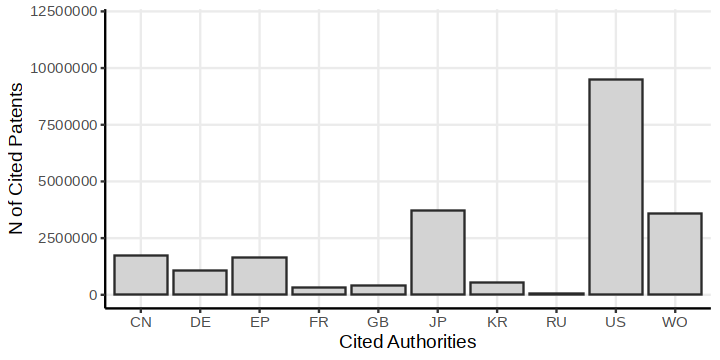

In [443]:
options(repr.plot.width = 6, repr.plot.height = 3)
pct_citation %>%
    .[, .(Cited_App_auth)] %>%
    .[, .N, keyby=Cited_App_auth] %>%
    .[order(-rank(N))] %>%
    .[nchar(Cited_App_auth) >=2] %>%
    head(10) %>%
    ggplot(aes(x=Cited_App_auth, y=N)) + 
    geom_col(fill=gray_scale[4], color=gray_scale[5]) + 
    theme_bw() + 
    ylim(0, 12000000) + 
    labs(x='Cited Authorities', y='N of Cited Patents') + 
    theme(
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        axis.line = element_line(color = "black"),
    )